# <span style='color:Blue'> PROJET 1 : Univariate Analysis  </span>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import IPython

Let us start with the recipe file that contains the reciped submitted to the website describes by several features. 
Below you'll find some code to read the data and print the first three rows. I used the `panda` library for these two steps, meaning that I will be manipulating a dataframe object. 

In [2]:
# Import the data and print the first three rows 
recipe = pd.read_csv("RAW_recipes.csv")
recipe.head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7


## Quelques infos sur la base de donnee Recipe

In [3]:
print("Quelques infos de notre base de donnee", recipe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB
Quelques infos de notre base de donnee None


In [4]:
# Statistique descriptive de la base de donnee, on exclut les variables "id" et "contributor_id" du calcul
# car leur calcul n'a aucun intérêt.
IPython.display.display(round(recipe.drop(['id', 'contributor_id'], axis = 1).describe(), 1))

,minutes,n_steps,n_ingredients
count,2.316370e+05,231637.0,231637.0
mean,9.398500e+03,9.8,9.1
std,4.461963e+06,6.0,3.7
min,0.000000e+00,0.0,1.0
25%,2.000000e+01,6.0,6.0
50%,4.000000e+01,9.0,9.0
75%,6.500000e+01,12.0,11.0
max,2.147484e+09,145.0,43.0


In [5]:
# Aperçu les 2 dernieres observations
recipe.tail(2)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10
231636,cookies by design sugar shortbread cookies,298509,20,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[174.9, 14.0, 33.0, 4.0, 4.0, 11.0, 6.0]",5,"['whip sugar and shortening in a large bowl , ...","i've heard of the 'cookies by design' company,...","['granulated sugar', 'shortening', 'eggs', 'fl...",7


## <span style='color:Blue'> Partie 1 : Temps moyen de cuisson et valeurs manquantes  </span>

### How many recipes are in the file ?

In [6]:
print("La base de donnee Recipe a", recipe.shape[0], "observations (récettes).")

La base de donnee Recipe a 231637 observations (récettes).


### How many variables do you have. Write the list in a md cell along with the type of the variable for each

In [7]:
print("La base de donnee Recipe comporte", recipe.shape[1], "variables.")

La base de donnee Recipe comporte 12 variables.


In [8]:
print("Ces 12 variables sont :\n", recipe.columns)

Ces 12 variables sont :
 Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


In [9]:
print("Le type de ces variables sont :\n", recipe.dtypes)

Le type de ces variables sont :
 name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object


### Are there any missing values in your dataset?

In [10]:
# Nombre de données manquantes par variable
IPython.display.display(print("Le nombre de données manquantes par variable : \n", recipe.isnull().sum()))

Le nombre de données manquantes par variable : 
 name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64


None

In [11]:
# Nombre total de donnees manquantes
print("Le nombre total de données manquantes dans Recipe est :", recipe.isnull().sum().sum())

Le nombre total de données manquantes dans Recipe est : 4980


In [12]:
# Valeurs uniques dans les variables
IPython.display.display(recipe.nunique())

name              230185
id                231637
minutes              888
contributor_id     27926
submitted           5090
tags              209115
nutrition         229318
n_steps               94
steps             231074
description       222668
ingredients       230475
n_ingredients         41
dtype: int64

List of variables : ['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients']

Comments:

### What is the average time required to make a recipe on the website ? 

In [13]:
# Average time 
avg_time = recipe['minutes'].mean()
print("Le temps moyen de préparation d'une récette est de {0:.2f}".format(avg_time), "minutes")

Le temps moyen de préparation d'une récette est de 9398.55 minutes


Odd ? What do you think ? 
Let's convert the maximum into hours and minutes to make it easier to understand. 

In [14]:
# Get hours with floor division 
hours = avg_time // 60
# Get minutes with modulus
minutes = avg_time % 60
print("Ce temps moyen correspond à {} heures et {} minutes ! C'est enorme !".format(round(hours), round(minutes)))

Ce temps moyen correspond à 156 heures et 39 minutes ! C'est enorme !


In [15]:
hours_max = recipe['minutes'].max() // 60
minutes_max = recipe['minutes'].max() % 60

Seems a lot ! I prefer to order in that case. Let's see what can cause this very high number by trying to answer the second question.

In [16]:
print("La durée maximale de cuisson est de {} heures et {} minutes ! C'est enorme !".format(round(hours_max), round(minutes_max)))
#print('La durée maximale de cuisson est', recipe['minutes'].max(), "minutes.")
print('La durée minimale de cuisson est', recipe['minutes'].min(), "minutes.")

La durée maximale de cuisson est de 35791394 heures et 7 minutes ! C'est enorme !
La durée minimale de cuisson est 0 minutes.


## <span style='color:Blue'> Partie 2 : identification des valeurs extrêmes </span>

### Print the row(s) of the dataframe corresponding to the maximum value for minutes

In [17]:
# Méthode 1 : on utilise nlargest
recipe.nlargest(2, "minutes", keep = 'first')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8
109624,how to preserve a husband,447963,1051200,576273,2011-02-01,"['time-to-make', 'course', 'preparation', 'for...","[407.4, 57.0, 50.0, 1.0, 7.0, 115.0, 5.0]",9,"['be careful in your selection', ""don't choose...","found this in a local wyoming cookbook ""a coll...","['cream', 'peach']",2


In [18]:
# Méthode 2 : on utilise .loc
recipe.loc[recipe['minutes'] == recipe["minutes"].max()]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144074,no bake granola balls,261647,2147483647,464080,2007-10-26,"['60-minutes-or-less', 'time-to-make', 'course...","[330.3, 23.0, 110.0, 4.0, 15.0, 24.0, 15.0]",9,"['preheat the oven to 350 degrees', 'spread oa...",healthy snacks that kids (and grown ups) will ...,"['rolled oats', 'unsweetened dried shredded co...",8


### Print the number of row(s) of the dataframe corresponding to the minimum value for minutes

In [19]:
# Méthode 1 : on utilise la fonction "min()"
recipe[recipe['minutes']==recipe['minutes'].min()].head(1)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4


In [20]:
# Méthode 2 : on utilise la fonction "nsmallest" et on affiche 5 observations.
recipe.nsmallest(1, "minutes", keep = 'first')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4


In [21]:
print("Dans la base de donnee Recipe, Il y'a", len(recipe[recipe['minutes']==recipe['minutes'].min()]), "observations (récettes) ayant un temps de cuisson nul.")

Dans la base de donnee Recipe, Il y'a 1094 observations (récettes) ayant un temps de cuisson nul.


### Choose an appropriate visualisation to highlight these outliers 


In [22]:
# Boxplot de "minutes"

Text(0.5, 1.0, "Histogramme de la variable 'minutes'")

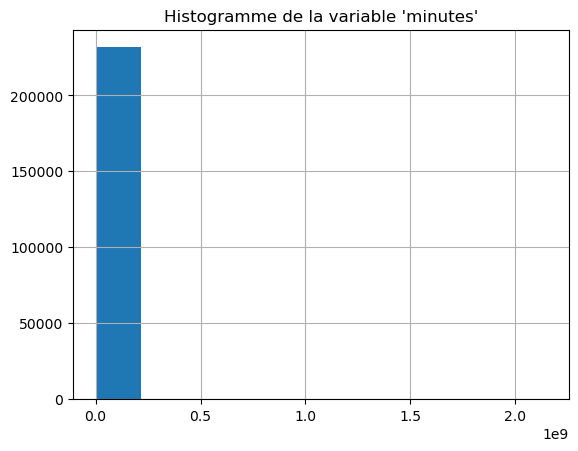

In [23]:
# Histogramme de la variable "minutes"
recipe['minutes'].hist()
plt.title("Histogramme de la variable 'minutes'")

## <span style='color:Blue'> Partie 3 : Traitement des données aberrantes  </span>

### Matplotlib

#### Online Documentation

The [matplotlib.org](https://matplotlib.org/) project website is the primary online resource for the library's documentation. It contains the example galleries, FAQs, API documentation, and tutorials.
You can take a look at the [Gallery](https://matplotlib.org/stable/gallery/index.html) to see the variety of ways one can make figures.

#### Basics of Matplotlib

Let's start by taking a closer look at the anatomy of a Matplolib plot by answering to the following questions. 

1. **What exactly is a Figure?** 

The top level container for all the plot elements. It is the overall window or page that everything is drawn on. The Figure object is instantiated by calling the `figure()` function from the pyplot module. You can create multiple independent Figures. A Figure can have several other things in it, such as a title, which is a centered title to the figure. You’ll also find that you can add a legend and color bar, for example, to your Figure.

2. **What are the Axes?** 

To the figure you add Axes. Axes object is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D visualisation) Axis objects (x and y). Axes can have ticks, labels, etc. associated with it.


**Note** We have previously imported the `pyplot` module of the `matplotlib` library under the alias `plt`.
Pyplot provides the state-machine interface to the underlying plotting library in matplotlib. This means that figures and axes are implicitly and automatically created to achieve the desired plot. For example, calling `plot` from `pyplot` will automatically create the necessary figure and axes to achieve the desired plot.

<img src="img/anatomy_01.png" alt="anatomy of a figure" />

Now that we have identified an abnormal values, what can we do with it? 

*Easy answer*: remove it ! (let's do this for now)

*Fancy answer*: consider this as a missing data input and impute it (keep that for later).

**Question**
- <span style="color:blue">Remove the recipe containing these abnormal values and check the new size of the data</span>
- <span style="color:blue">Print the 5 first observations for which abnormal values are observed. Comment</span>
- <span style="color:blue">Propose a strategy to deal with these observations.</span>
- <span style="color:blue">In total how many observations have you removed?</span>

### Remove the recipe containing these abnormal values and check the new size of the data

In [24]:
# On récupére les "index" des observations lorsque la variable "minutes" est égale à 0mn, 1mn et max.
indexNames_0_max = recipe[(recipe['minutes']==0) & (recipe['minutes'].max())].index
index_1minute = recipe[recipe['minutes']==1].index

In [25]:
# On supprime ces observations
recipe.drop(indexNames_0_max, inplace=True)
recipe.drop(index_1minute, inplace=True)

In [26]:
print("Le nombre d'observations de Recipe devient", recipe.shape[0], "au lieu de 231 637 que précédemment.")

Le nombre d'observations de Recipe devient 230001 au lieu de 231 637 que précédemment.


### Check the new maximum and minimum

In [27]:
print("Le nouveau minimum de la variable \"minutes\" est :", recipe['minutes'].min(),"minute.")
print("Le nouveau maximum de la variable \"minutes\" est :", recipe['minutes'].max())
print("Cela reste énorme comme temps de cuisson !")

Le nouveau minimum de la variable "minutes" est : 2 minute.
Le nouveau maximum de la variable "minutes" est : 2147483647
Cela reste énorme comme temps de cuisson !


### In total how many observations have you removed ?

In [28]:
# On décide de ne garder que les donnees dont la variable "minutes" ne depasse pas 1 mois.
recipe = recipe.loc[recipe['minutes'] <= 43800]
print("Enfin, le nombre d'observations de Recipe est", recipe.shape[0])
print("On a supprimé 1692 observations.")

Enfin, le nombre d'observations de Recipe est 229945
On a supprimé 1692 observations.


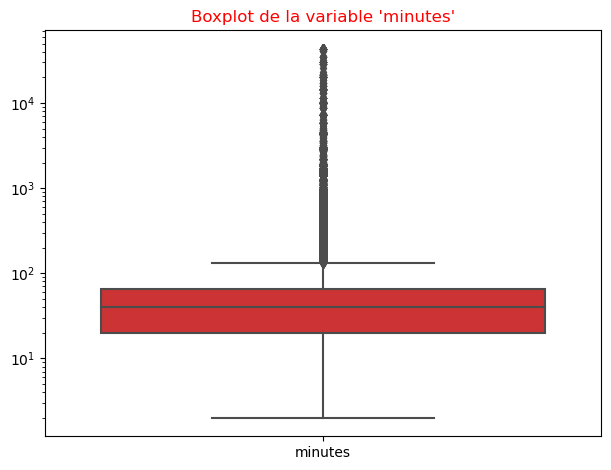

In [29]:
# On refait la Boxplot de la variable "minutes"
sns.boxplot(recipe['minutes'], sym = 'o', palette="Set1") #palette = colorie la boite
plt.title("Boxplot de la variable 'minutes'", color='red')
plt.gca().xaxis.set_ticklabels(['minutes'])
plt.tight_layout()
plt.yscale('log') #l'axe des ordonnees en échelle logarithmique 
plt.show()

### Plot the variable minutes with a boxplot -- this time you can try seaborn!

<Axes: >

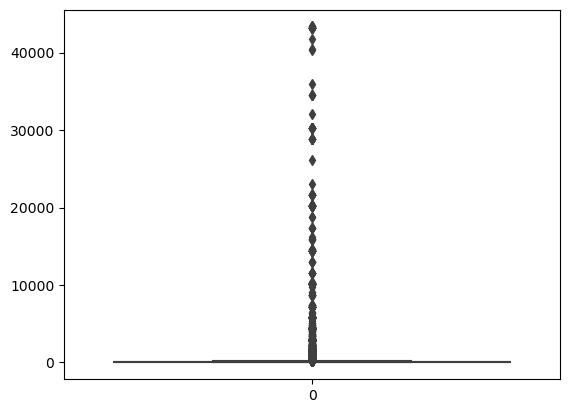

In [30]:
# Plot the variable minutes with a boxplot -- this time you can try seaborn!
sns.boxplot(recipe['minutes'])

Comments: 

So in this particular case, boxplot suffers from the very high standard deviation observed for the feature minutes. 
Can we come up with a better visualisation ? 

- **Option 1**: use a log-scale on the y axis the feature
- **Option 2**: remove a lot of values

**Questions**: 

### <span style="color:blue"> Print the values of the different quartile (Q1, median and Q3). What can you conclude for this variable ? </span>

In [31]:
# Premier quartile Q1
Q1 = round(np.percentile(recipe['minutes'], 25))
print("Le premier quartile Q1 vaut : ", Q1, "mn")

Le premier quartile Q1 vaut :  20 mn


In [32]:
# Troisième quartile Q3
Q3 = round(np.percentile(recipe['minutes'], 75))
print("Le second quartile Q3 vaut : ", Q3, "mn")

Le second quartile Q3 vaut :  65 mn


In [33]:
# Q1 = 20 minutes signifie que 75% des recettes mettent au dessus de 20 mn alors que 25% ont 
# un temps inférieur à 20 mn.
# Q3 = 65 minutes signifie 75% des recettes mettent en dessous de 1h5 mn alors que 25% ont 
# un temps inférieur à 1h5 mn.

### <span style="color:blue">  Compare the mean with the median. What do you observe? </span>

In [34]:
# Médiane = deuxième quartile (Q2)
Mediane = round(np.percentile(recipe['minutes'], 50))
print("Le temps median est", Mediane, "mn.")

Le temps median est 40 mn.


In [35]:
hoursM = recipe['minutes'].mean() // 60
minutesM = recipe['minutes'].mean() % 60
print("Le temps moyen de cuisson est de {} heures et {} minutes !".format(round(hoursM), round(minutesM)))
print("Ce temps moyen est tiré vers le haut par les grandes valeurs de la variable 'minutes'.")

Le temps moyen de cuisson est de 1 heures et 39 minutes !
Ce temps moyen est tiré vers le haut par les grandes valeurs de la variable 'minutes'.


In [36]:
print("Le temps moyen est fortement influé par les grandes valeurs de \"minutes\".")
print("On constate un écart presque d'une heure entre le temps moyen et le temps médian.")
print("Dans ce cas de figure, on se refère plutôt au temps median de recette que le temps moyen.")

Le temps moyen est fortement influé par les grandes valeurs de "minutes".
On constate un écart presque d'une heure entre le temps moyen et le temps médian.
Dans ce cas de figure, on se refère plutôt au temps median de recette que le temps moyen.


### <span style="color:blue">Create a subplot with on the left the original boxplot, and on the right the same boxplot but with a log scale on the y-axis.</span> 

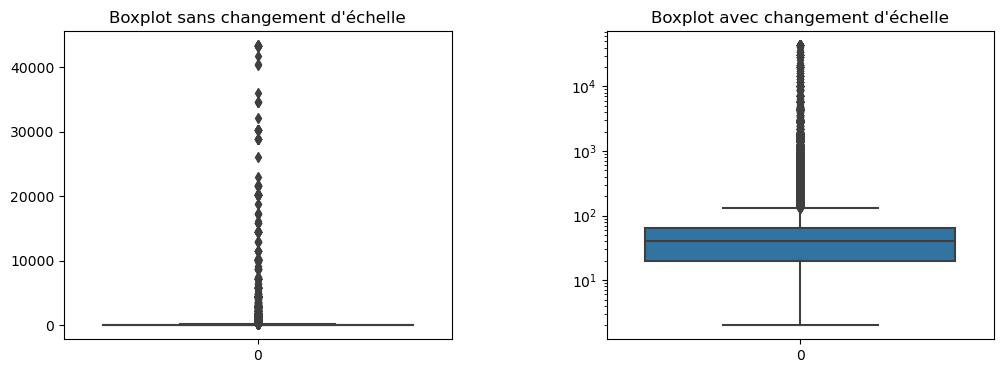

In [37]:
plt.figure(figsize=(12, 4))  # Ajustez la taille de la figure au besoin
plt.subplots_adjust(wspace=0.4)  # Ajustez l'espacement entre les graphiques

#Figure 1
# Créez le premier graphique (à gauche)
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, premier graphique
sns.boxplot(recipe['minutes'])
plt.title("Boxplot sans changement d'échelle")

#Figure 2
# Créez le premier graphique (à droite)
plt.subplot(1, 2, 2)  
sns.boxplot(recipe['minutes'])
plt.title("Boxplot avec changement d'échelle")
plt.yscale('log') 
plt.show()

#### Subplots

The matplotlib.pyplot.subplots method provides a way to plot multiple plots on a single figure. Given the number of rows and columns, it returns a tuple `(fig, ax`), giving a single figure `fig` with an array of axe `ax`.

There is at least three different ways to create a subplot and to add plots to each created ax (dig in the documentation). 
More details on the different arguments of the `subplots` method [here](https://www.educative.io/edpresso/what-is-a-subplots-in-matplotlib).

#### Summing-up: 

Comments.

For now let's keep it this way. We will go back to this matter in the feature engineering session.

Now we can complete this analysis with distribution metrics, namely the skewness and the kurtosis coefficient. 

## <span style="color:blue"> Analyse univariée de la variable "contributor_id" </span>

You are now ready to propose your own analysis for the other variables. 
Consider the following variables: **contributor_id, tags, n_steps, n_ingredients and ingredients**. 
The first step is to formulate questions that you would like to answer to using these variables. 

For example, if we take the contributor_id, please answer the following questions using the varying tools seen during the class. 

**Questions**
Start with these three questions, then think about questions for the remaining variables mentioned above. 

### How many unique contributors are there?

In [38]:
print("L'unique contributeur a cet identifiant :", recipe['contributor_id'].nunique())

L'unique contributeur a cet identifiant : 27831


### Who is the contributor that posted the most recipes ? And how many recipes did that person posted ?

In [39]:
# convertir contributor_id en catégorie avec astype

In [40]:
recipe['contributor_id'].value_counts()

89831      3107
37779      2553
37449      2492
58104      1518
1533       1471
           ... 
438645        1
304753        1
350975        1
11016         1
1500678       1
Name: contributor_id, Length: 27831, dtype: int64

In [41]:
print("Le plus grand contributeur à cet identifiant:", recipe['contributor_id'].value_counts().index[0],
     "et sa contribution s'élève à 3107 soit", round(len(recipe[recipe['contributor_id']==89831])*100/recipe.shape[0],2), "%")

Le plus grand contributeur à cet identifiant: 89831 et sa contribution s'élève à 3107 soit 1.35 %


In [42]:
#On visualise 3 de ces contributions
recipe[recipe['contributor_id']==89831].head(3)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
144,add in anything muffins,149593,15,89831,2005-12-28,"['15-minutes-or-less', 'time-to-make', 'course...","[209.3, 18.0, 44.0, 8.0, 5.0, 36.0, 7.0]",10,"['set oven to 400 degrees', 'set oven rack to ...","this is a never-fail muffin recipe, it's a bla...","['flour', 'sugar', 'baking powder', 'baking so...",9
145,almost dairy queen blizzard ice cream cake,227924,300,89831,2007-05-14,"['course', 'main-ingredient', 'preparation', '...","[455.3, 37.0, 158.0, 13.0, 11.0, 57.0, 19.0]",11,"['prepare a 13 x 9-inch pan', 'for the crust',...","just wait until you taste this, it is so easy ...","['oreo cookies', 'vanilla ice cream', 'frozen ...",4
222,kicked up oven fried chicken,141939,345,89831,2005-10-19,"['time-to-make', 'course', 'main-ingredient', ...","[215.0, 17.0, 14.0, 15.0, 13.0, 22.0, 7.0]",13,"['in a large bowl whisk the buttermilk , oil ,...",i make mine on one cookie rack placed on a bak...,"['buttermilk', 'oil', 'hot pepper sauce', 'dij...",17


### What is the average number of recipes posted by users on the website ?

In [43]:
print("Le nombre moyen de contribution est ", round(recipe['contributor_id'].value_counts().mean()))

Le nombre moyen de contribution est  8


## <font color='Blue'> Analyse univariée de la variable "n_ingrédients" </font>

In [44]:
# "n_ingredients" correspond au nombre d'ingrédients utilisés.

In [45]:
# Statistique descriptive de "n_ingredients"
print("Statistique descriptive du nombre d'ingrédients :\n", round(recipe['n_ingredients'].describe(), 1))
print("\nEn moyenne, 9 ingrédients ont été utilisés.")

Statistique descriptive du nombre d'ingrédients :
 count    229945.0
mean          9.1
std           3.7
min           1.0
25%           6.0
50%           9.0
75%          11.0
max          43.0
Name: n_ingredients, dtype: float64

En moyenne, 9 ingrédients ont été utilisés.


In [46]:
print("Le nombre maximal d'ingrédients utilisé dans une recette est :", recipe['n_ingredients'].describe()[7])
print("Le nombre minimal d'ingrédients utilisé dans une recette est :", recipe['n_ingredients'].describe()[3])

Le nombre maximal d'ingrédients utilisé dans une recette est : 43.0
Le nombre minimal d'ingrédients utilisé dans une recette est : 1.0


In [47]:
freq_ningredients = pd.DataFrame(recipe['n_ingredients'].value_counts().sort_index()).\
         reset_index().rename(columns={"index":"n_ingredients", "n_ingredients":"freq"})
freq_ningredients = freq_ningredients.sort_values(by="freq", ascending=False)
freq_ningredients["%"]=round(freq_ningredients["freq"]*100/freq_ningredients["freq"].sum(),2)
freq_ningredients.head()

,n_ingredients,freq,%
7,8,25354,11.03
8,9,24488,10.65
6,7,24446,10.63
9,10,22316,9.70
5,6,21690,9.43


In [48]:
print("Le nombre d'ingrédients moyen est 8, cela représente 11,03%")

Le nombre d'ingrédients moyen est 8, cela représente 11,03%


### Courbes de la variable "nombre d'ingrédients"

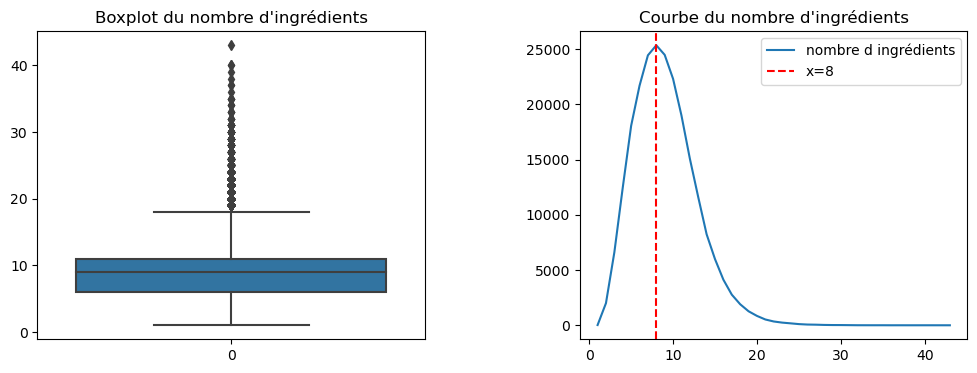

In [49]:
# Créez une figure et une grille de 1 ligne et 2 colonnes
plt.figure(figsize=(12, 4))  # Ajustez la taille de la figure au besoin
plt.subplots_adjust(wspace=0.4)  # Ajustez l'espacement entre les graphiques
#Figure 1 : le premier graphique (à gauche)
plt.subplot(1, 2, 1)
sns.boxplot(recipe['n_ingredients'])
plt.title("Boxplot du nombre d'ingrédients")

#Figure 2 : le premier graphique (à droite)
plt.subplot(1, 2, 2)
plt.plot(recipe['n_ingredients'].value_counts().sort_index(), label='nombre d ingrédients')
plt.axvline(x=8, color = "red", linestyle='--', label='x=8')
plt.title("Courbe du nombre d'ingrédients")
plt.legend()
plt.show()

## <font color='Blue'> Analyse univariée de la variable "ingrédients" </font>

### Combien de personnes ont utilisés un seul ingrédient dans leur recette ?

In [50]:
print("Il y a", len(recipe[recipe['n_ingredients']==2]), "clients qui ont utilisé deux incrédient.")

Il y a 2006 clients qui ont utilisé deux incrédient.


### Combien de personnes ont utilisés les oeufs dans leurs recettes ?

In [51]:
recipe['ingredients'].head(4)

0    ['winter squash', 'mexican seasoning', 'mixed ...
1    ['prepared pizza crust', 'sausage patty', 'egg...
2    ['ground beef', 'yellow onions', 'diced tomato...
3    ['spreadable cheese with garlic and herbs', 'n...
Name: ingredients, dtype: object

In [52]:
recipe_eggs = recipe['ingredients'].str.contains('eggs')

In [53]:
print("Il y a ", len(recipe['ingredients'][recipe_eggs]), "personnes qui ont utilisés les oeufs dans leurs recettes.")

Il y a  35117 personnes qui ont utilisés les oeufs dans leurs recettes.


## <font color='Blue'>Analyse univariée de la variable "submitted"</font>

In [54]:
print("Le but étant de déterminer l'année oû il y'a plus et moins de soumission.")

Le but étant de déterminer l'année oû il y'a plus et moins de soumission.


In [55]:
recipe['recipe_date_soumission'] = recipe['submitted'].str.split("-").str[0]
#recipe['recipe_date_soumission'].head(3)

### Nombre d'années de soumission de récettes

In [56]:
print("Toutes les recettes ont été soumises en", recipe['recipe_date_soumission'].value_counts().count(), "ans.")

Toutes les recettes ont été soumises en 20 ans.


### L'année où  il y'a eu la plus forte soumission...

In [57]:
print("C'est en", recipe['recipe_date_soumission'].value_counts().index[0], "qu'il y'a eu un très grand nombre de soumission de récettes.")
print("La quantité de récette soumise s'élève à", recipe['recipe_date_soumission'].value_counts()[0])

C'est en 2007 qu'il y'a eu un très grand nombre de soumission de récettes.
La quantité de récette soumise s'élève à 34195


### L'année où  il y'a eu la plus faible soumission...

In [58]:
print("C'est en", recipe['recipe_date_soumission'].value_counts().index[19], "qu'il y'a eu une très faible soumission de récettes.")
print("La quantité de récette soumise cette année s'élève à", recipe['recipe_date_soumission'].value_counts()[19])

C'est en 2018 qu'il y'a eu une très faible soumission de récettes.
La quantité de récette soumise cette année s'élève à 189


### Diagramme en barre : quantité de récette soumise Vs année

In [59]:
# On fait un diagramme en barre du nombre de soumission réalisé par année

In [60]:
recipe['recipe_date_soumission'].value_counts().index

Index(['2007', '2008', '2006', '2005', '2009', '2002', '2003', '2004', '2010',
       '2011', '2012', '2001', '2013', '1999', '2014', '2000', '2015', '2017',
       '2016', '2018'],
      dtype='object')

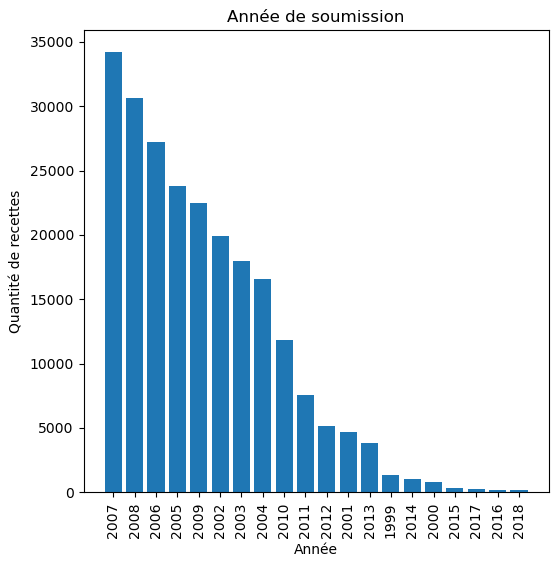

In [61]:
plt.figure(figsize =(6, 6))
date_soumission = recipe['recipe_date_soumission'].value_counts()
labels = recipe['recipe_date_soumission'].value_counts().index
xs = [i + 0.1 for i, _ in enumerate(labels)]
plt.bar(xs, date_soumission)
plt.xticks([i + 0.1 for i, _ in enumerate(labels)], labels, rotation=90)
plt.title("Année de soumission")
plt.xlabel("Année")
plt.ylabel("Quantité de recettes")
plt.show()

## <span style='color:Blue'> Partie 4: Analyse Bivariée  </span>

In [62]:
# D'abord on crée 7 nouvelles variables quantitatives en splittant la variable "nutrition". 

In [63]:
# Elles s'appellent :'calories','total_fat','sugar','sodium','protein','saturated_fat','carbohydrates'
recipe[['calories','total_fat','sugar','sodium','protein','saturated_fat','carbohydrates']] = recipe.nutrition.str.split(",",expand=True) 

In [64]:
recipe['calories'] =  recipe['calories'].apply(lambda x: x.replace('[',''))
recipe['carbohydrates'] = recipe['carbohydrates'].apply(lambda x: x.replace(']',''))

In [65]:
# Ce 7 nouvelles variables sont de type "float"
recipe[['calories','total_fat','sugar','sodium','protein','saturated_fat','carbohydrates']] = recipe[['calories','total_fat','sugar','sodium','protein','saturated_fat','carbohydrates']].astype('float')

In [66]:
recipe.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'recipe_date_soumission', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates'],
      dtype='object')

In [67]:
# On crée une data ne comportant que les variables quantitatives de "recipe" en plus de 7 nouvelles crées juste au-dessus
data = recipe[['id', 'contributor_id', 'name', 'minutes', 'n_steps','n_ingredients', 'calories', 'total_fat', 'sugar', 'sodium', 'protein','saturated_fat', 'carbohydrates']]
data.head(1)

,id,contributor_id,name,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,137739,47892,arriba baked winter squash mexican style,55,11,7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


C:\Users\PC\AppData\Local\Temp\ipykernel_7612\3310276329.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(data.drop(['id', 'contributor_id', 'n_steps'], axis=1).corr(), 2), cmap='coolwarm', annot=True)


<Axes: >

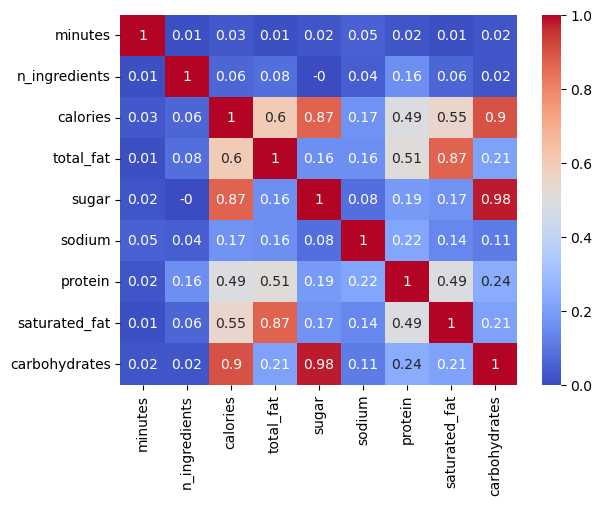

In [68]:
sns.heatmap(round(data.drop(['id', 'contributor_id', 'n_steps'], axis=1).corr(), 2), cmap='coolwarm', annot=True)

## Représentation Graphique

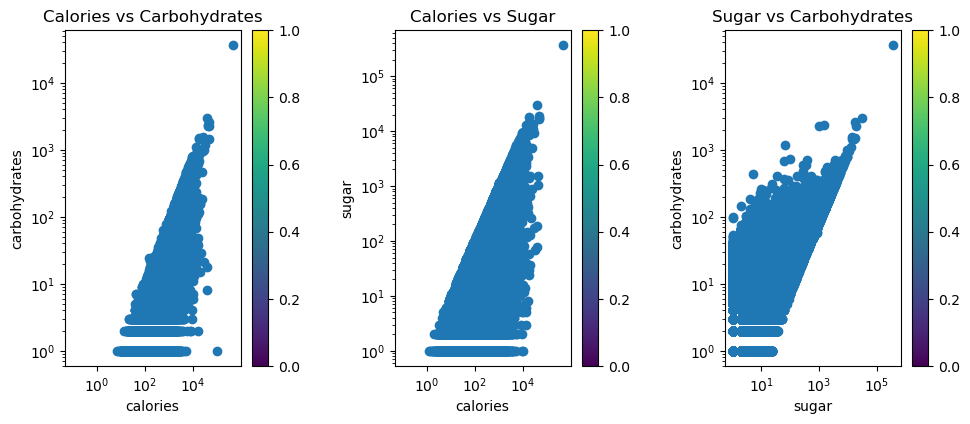

In [69]:
# Espacer les figures
plt.gcf().subplots_adjust(left = 0.125, bottom = 0.2, right = 1.5, top = 0.9, wspace = 0.5, hspace = 0)

# Figure 1 entre recipe['carbohydrates'], recipe['calories']
# plt.figure(figsize=(4,4))
plt.subplot(1,3,1)
plt.scatter(recipe['calories'], recipe['carbohydrates'])
plt.xlabel("calories")
plt.ylabel("carbohydrates")
plt.xscale('log') #l'axe des ordonnees en échelle logarithmique 
plt.yscale('log') #l'axe des ordonnees en échelle logarithmique 
plt.title("Calories vs Carbohydrates")
plt.colorbar()

# Figure 2 entre recipe['carbohydrates'], recipe['calories']
# plt.figure(2,figsize=(4,4))
plt.subplot(1,3,2)
plt.scatter(recipe['calories'], recipe['sugar'])
plt.xlabel("calories")
plt.ylabel("sugar")
plt.xscale('log') #l'axe des ordonnees en échelle logarithmique 
plt.yscale('log') #l'axe des ordonnees en échelle logarithmique 
plt.title("Calories vs Sugar")
plt.colorbar()

# Figure 3 entre recipe['sugar'], recipe['calories']
# plt.figure(3, figsize=(4,4))
plt.subplot(1,3,3)
plt.scatter(recipe['sugar'], recipe['carbohydrates'])
plt.xlabel("sugar")
plt.ylabel("carbohydrates")
plt.xscale('log') #l'axe des ordonnees en échelle logarithmique 
plt.yscale('log') #l'axe des ordonnees en échelle logarithmique 
plt.title("Sugar vs Carbohydrates")
plt.colorbar()

plt.show()